# What are Autoencoders?
An autoencoder is, by definition, a technique to encode something automatically. By using a neural network, the autoencoder is able to learn how to decompose data (in our case credit card fraud detection data) into fairly small bits of data, and then using that representation, reconstruct the original data as closely as it can to the original.

Two main components:

Encoder: Learns how to compress the original input into a small encoding

Decoder: Learns how to restore the original data from that encoding generated by the Encode

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the extremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

In [3]:
import pandas as pd
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
np.random.seed(203)

In [16]:
data = pd.read_csv("D:/dl/creditcard.csv")
data=data.iloc[1:50000,]
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


scale the dataset and saperate it into fraud and non fraud cases

In [17]:
x = data.drop(["Class"], axis=1)
y = data["Class"].values

x_scale = preprocessing.MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]



# Build The Autoencoder Model

## Encoder
The Encoder is tasked with finding the smallest possible representation of data that it can store - extracting the most prominent features of the original data and representing it in a way the decoder can understand.

## Decoder
The Decoder works in a similar way to the encoder, but the other way around. It learns to read, instead of generate,

![image.png](attachment:image.png)

In [18]:
## input layer 
input_layer = Input(shape=(x.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(x.shape[1], activation='relu')(decoded)


In [19]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

scale the dataset and saperate it into fraud and non fraud cases

# Train the model
now we are going to train our model on 2000 non fraud data observations.we do not need too many samples of data for learning the good representations. We will use only 2000 rows of non fraud cases to train the autoencoder. Additionally, We do not need to run this model for a large number of epochs.

In [20]:
history=autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split =0.20);

Epoch 1/10
7/7 [==============================] - 1s 56ms/step - loss: 0.2624 - val_loss: 0.2614
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2620 - val_loss: 0.2610
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2615 - val_loss: 0.2606
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2611 - val_loss: 0.2602
Epoch 5/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2607 - val_loss: 0.2598
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2603 - val_loss: 0.2594
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2599 - val_loss: 0.2590
Epoch 8/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2594 - val_loss: 0.2585
Epoch 9/10
7/7 [==============================] - 0s 15ms/step - loss: 0.2590 - val_loss: 0.2581
Epoch 10/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2586 - val_loss: 0.2577


## Visualization of model loss

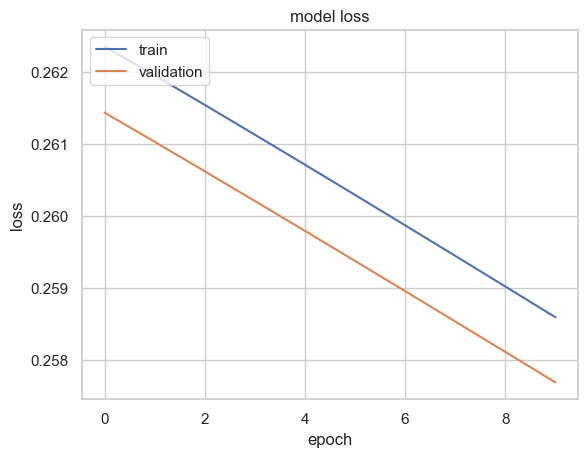

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Obtain the Latent Representations
Now, the model is trained. We are intereseted in obtaining latent representation of the input learned by the model. This can be accessed by the weights of the trained model. We will create another network containing sequential layers, and we will only add the trained weights till the third layer where latent representation exists.

In [22]:
hid_rep = Sequential()
hid_rep .add(autoencoder.layers[0])
hid_rep .add(autoencoder.layers[1])
hid_rep .add(autoencoder.layers[2])

Generate the hidden representations of two classes : non-fraud and fraud by predicting the raw inputs using the above model.

In [23]:
norm_hid_rep = hid_rep .predict(x_norm[:3000])
fraud_hid_rep = hid_rep .predict(x_fraud)

5/5 [==============================] - 0s 2ms/step


## TSNE representation of oroginal dataset

In [24]:
non_fraud = data[data['Class'] == 0].sample(1000)
fraud = data[data['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
df.head()

C:\Users\Mahi's Pc\AppData\Local\Temp\ipykernel_20476\3765671190.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38599.0,0.551513,-0.774560,0.058670,1.646622,-0.421527,-0.055435,0.519087,-0.122230,0.187704,...,0.095627,-0.188447,-0.347108,0.123057,0.561302,-0.348139,-0.017294,0.072275,326.00,0
1,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
2,9005.0,-0.526247,1.149861,2.703251,3.390222,-0.324171,0.054225,-0.034813,0.034666,0.383505,...,0.059796,0.756578,-0.065714,0.928082,-0.322286,0.270054,0.410002,0.227184,15.98,0
3,28288.0,-0.895611,0.272443,2.690128,0.801816,0.244176,0.804655,0.173086,0.177492,-0.585701,...,0.262425,0.774238,-0.147332,-0.281102,0.158567,-0.215402,-0.057914,-0.131049,72.00,0
4,33583.0,-1.490303,-0.233840,2.097892,1.394208,1.447899,-0.640690,-0.342847,0.356372,-1.023793,...,0.377139,0.563079,-0.006113,-0.035321,-0.097726,-0.139714,0.052029,0.152085,10.62,0


In [25]:
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [26]:
def tsne_plot(x1, y1, name="graph.png"):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Non Fraud')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth='1', alpha=0.8, label='Fraud')

    plt.legend(loc='best');
    plt.savefig(name);
    plt.show();
    
tsne_plot(X, Y, "original.png")

C:\Users\Mahi's Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mahi's Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TypeError: must be real number, not str

Error in callback <function _draw_all_if_interactive at 0x000002001CB163B0> (for post_execute):


TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 1200x800 with 1 Axes>

Now we will create a dataset using the latent representations obtained and let's visualize the nature of fraud vs non-fraud cases.

In [ ]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y, "latent_representation.png")


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression().fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_x, train_y)
pred_y = svclassifier.predict(val_x)

print ("")
print ("confusion_matrixt: ")
print (confusion_matrix(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))

In [27]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [28]:
df = pd.read_csv("D:/dl/creditcard.csv")

In [29]:
df.shape

(284807, 31)

In [30]:
df.isnull().values.any()

False

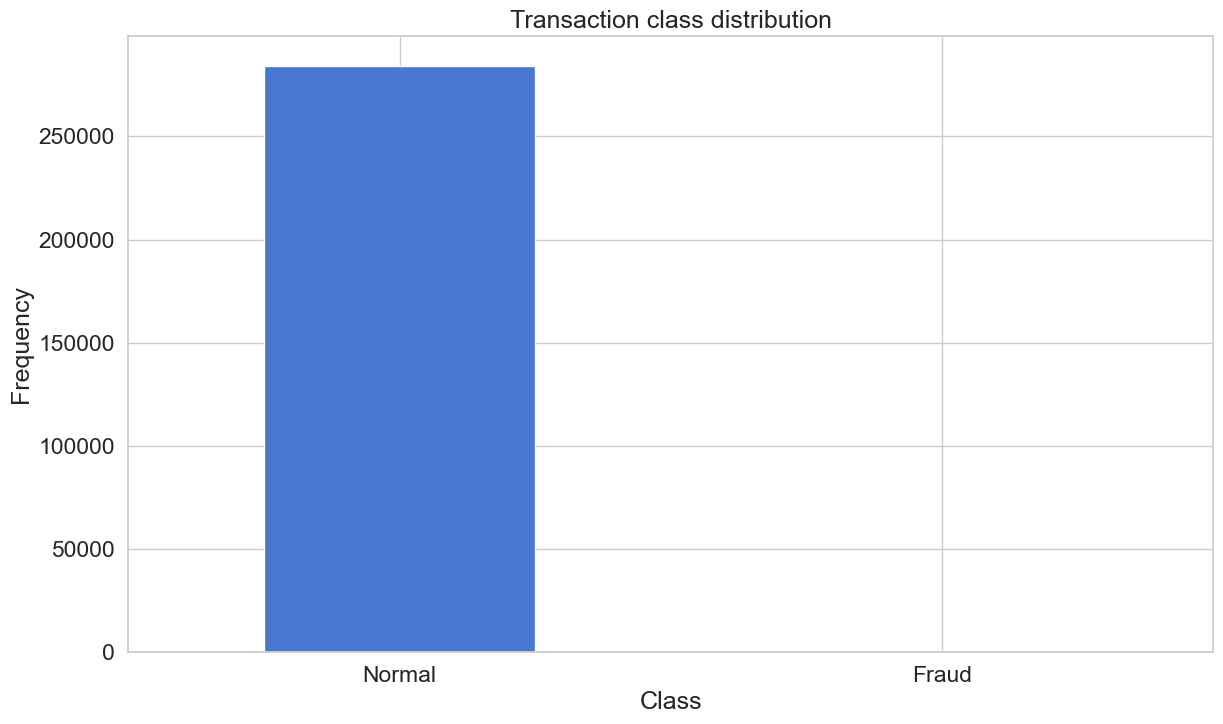

In [31]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [32]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

In [33]:
frauds.shape

(492, 31)

In [34]:
normal.shape

(284315, 31)

In [35]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [36]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

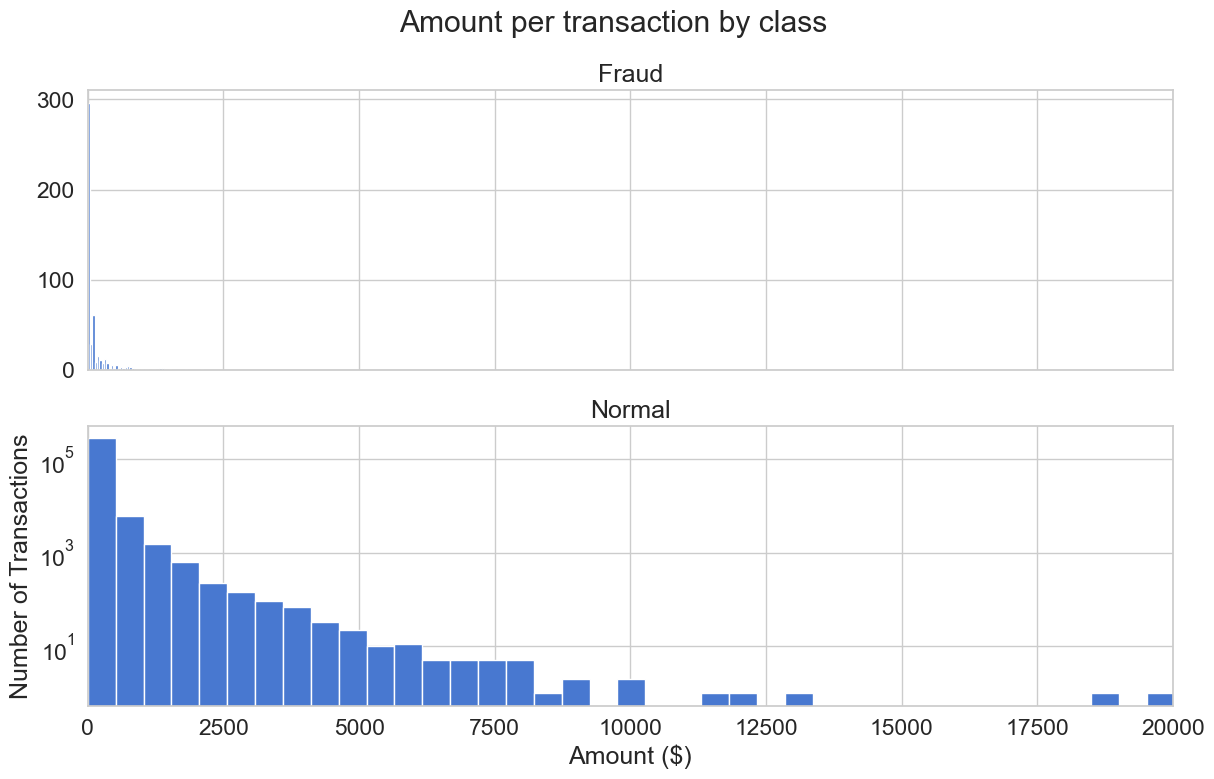

In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

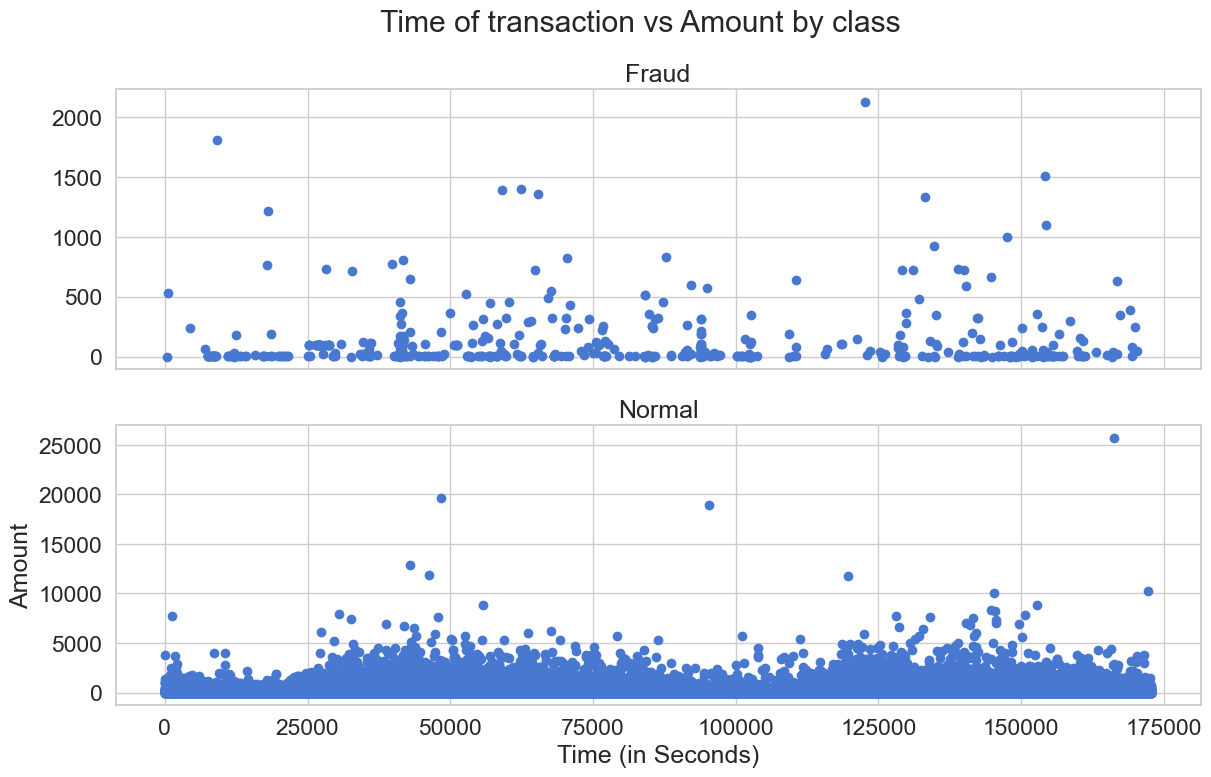

In [38]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [40]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [41]:
X_train.shape

(227451, 29)

In [42]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [43]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [44]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
7108/7108 [==============================] - 20s 3ms/step - loss: 0.8086 - accuracy: 0.5771 - val_loss: 0.7815 - val_accuracy: 0.6472
Epoch 2/100
7108/7108 [==============================] - 17s 2ms/step - loss: 0.7355 - accuracy: 0.6669 - val_loss: 0.7566 - val_accuracy: 0.6832
Epoch 3/100
7108/7108 [==============================] - 17s 2ms/step - loss: 0.7204 - accuracy: 0.6895 - val_loss: 0.7475 - val_accuracy: 0.6998
Epoch 4/100
7108/7108 [==============================] - 16s 2ms/step - loss: 0.7139 - accuracy: 0.7007 - val_loss: 0.7437 - val_accuracy: 0.7122
Epoch 5/100
7108/7108 [==============================] - 18s 2ms/step - loss: 0.7108 - accuracy: 0.7059 - val_loss: 0.7426 - val_accuracy: 0.7008
Epoch 6/100
7108/7108 [==============================] - 17s 2ms/step - loss: 0.7081 - accuracy: 0.7098 - val_loss: 0.7375 - val_accuracy: 0.7051
Epoch 7/100
7108/7108 [==============================] - 18s 3ms/step - loss: 0.7054 - accuracy: 0.7101 - val_loss: 0.7356 -

Epoch 57/100
7108/7108 [==============================] - 16s 2ms/step - loss: 0.6944 - accuracy: 0.7206 - val_loss: 0.7287 - val_accuracy: 0.7221
Epoch 58/100
7108/7108 [==============================] - 17s 2ms/step - loss: 0.6944 - accuracy: 0.7204 - val_loss: 0.7324 - val_accuracy: 0.7204
Epoch 59/100
7108/7108 [==============================] - 18s 2ms/step - loss: 0.6943 - accuracy: 0.7210 - val_loss: 0.7293 - val_accuracy: 0.7182
Epoch 60/100
7108/7108 [==============================] - 18s 2ms/step - loss: 0.6943 - accuracy: 0.7204 - val_loss: 0.7282 - val_accuracy: 0.7238
Epoch 61/100
7108/7108 [==============================] - 15s 2ms/step - loss: 0.6943 - accuracy: 0.7213 - val_loss: 0.7289 - val_accuracy: 0.7173
Epoch 62/100
7108/7108 [==============================] - 17s 2ms/step - loss: 0.6940 - accuracy: 0.7212 - val_loss: 0.7276 - val_accuracy: 0.7280
Epoch 63/100
7108/7108 [==============================] - 16s 2ms/step - loss: 0.6941 - accuracy: 0.7220 - val_loss: 0

In [45]:
autoencoder = load_model('model.h5')

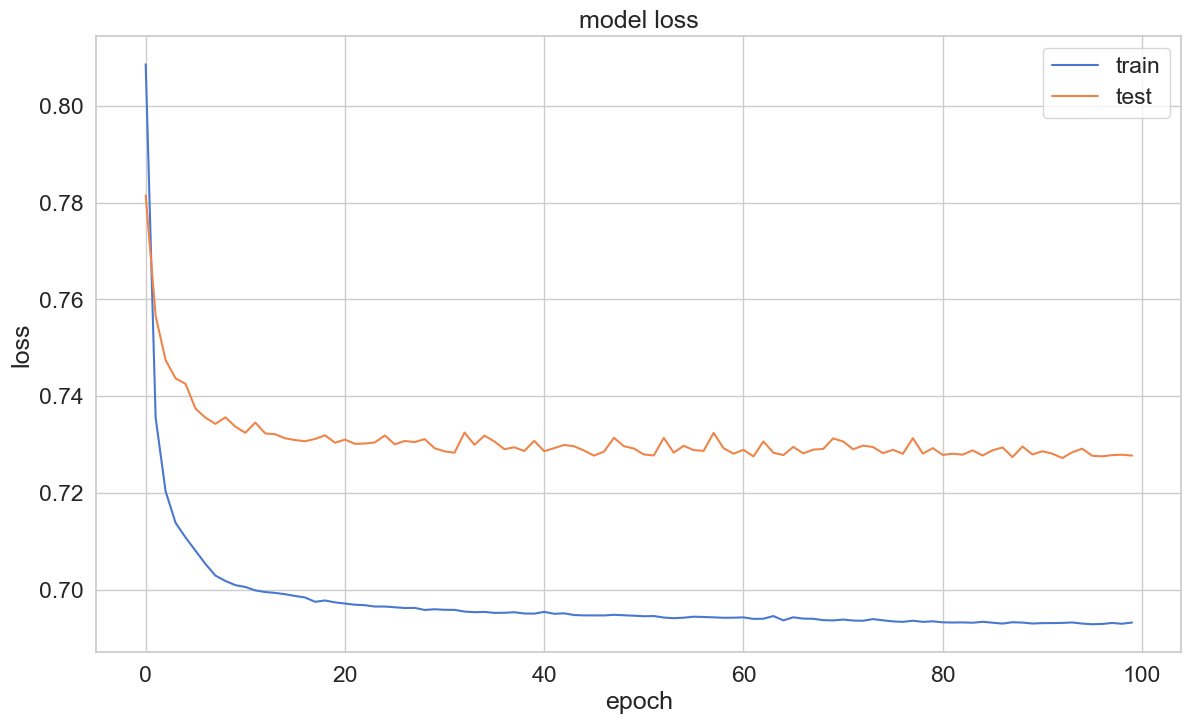

In [46]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [47]:
predictions = autoencoder.predict(X_test)

1781/1781 [==============================] - 3s 2ms/step


In [48]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [49]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.726340,0.001720
std,3.417210,0.041443
min,0.040146,0.000000
25%,0.242313,0.000000
50%,0.383783,0.000000
75%,0.607831,0.000000
max,262.758293,1.000000


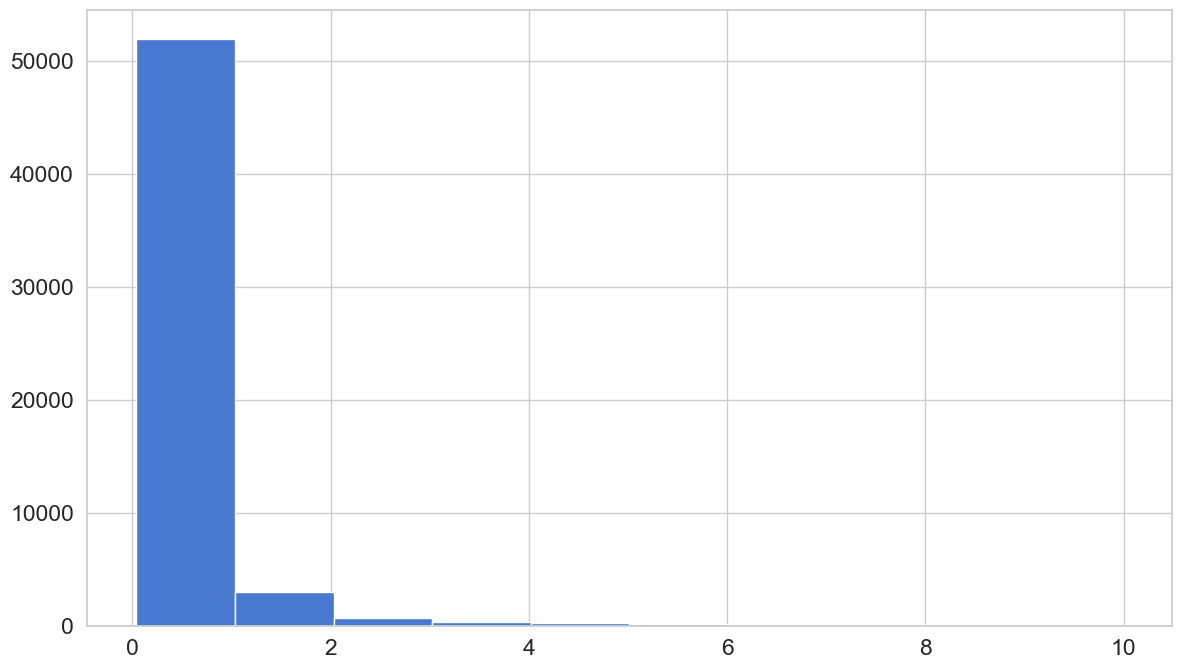

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

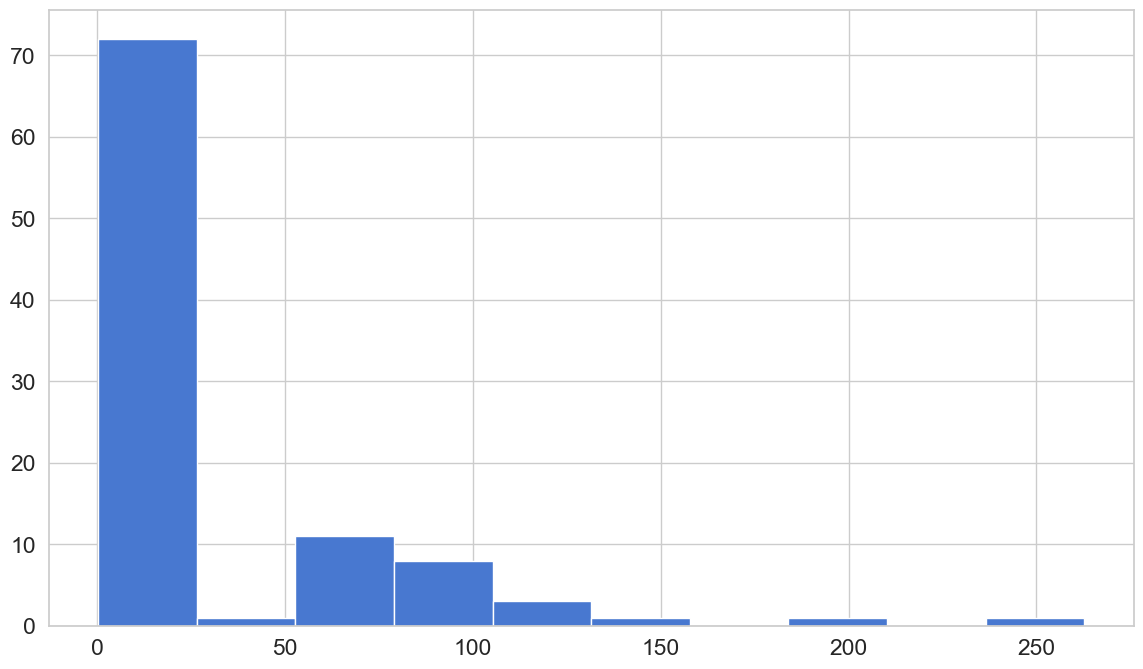

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [52]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

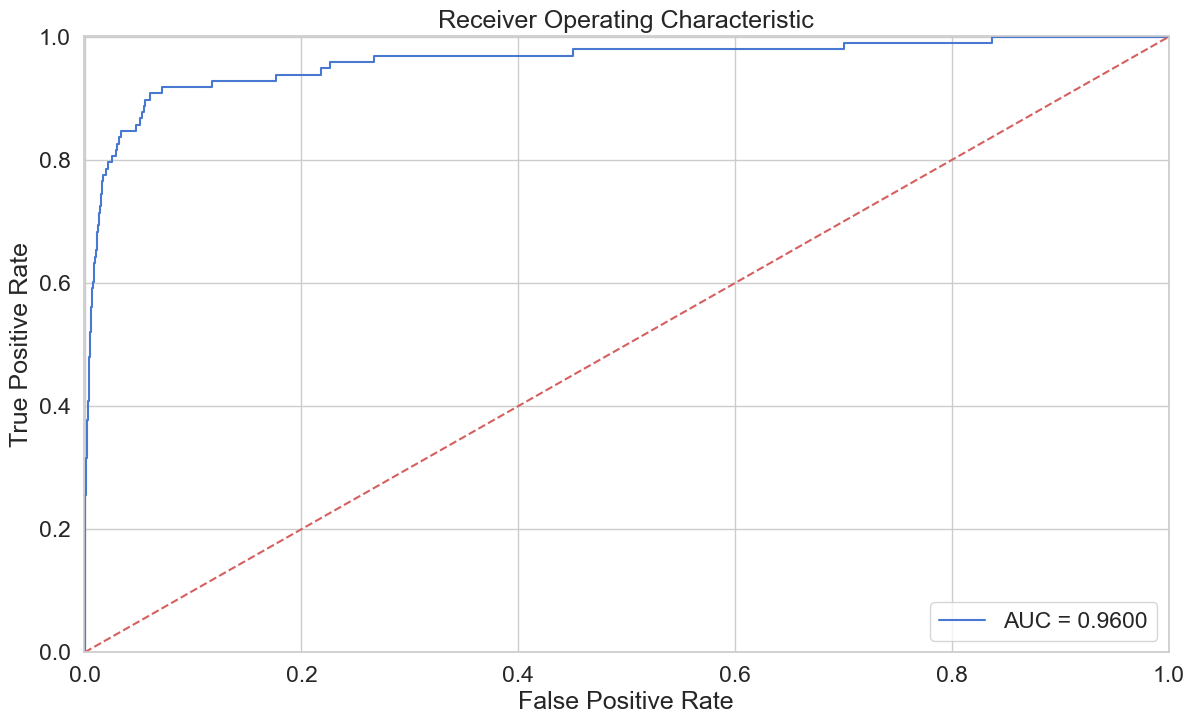

In [53]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

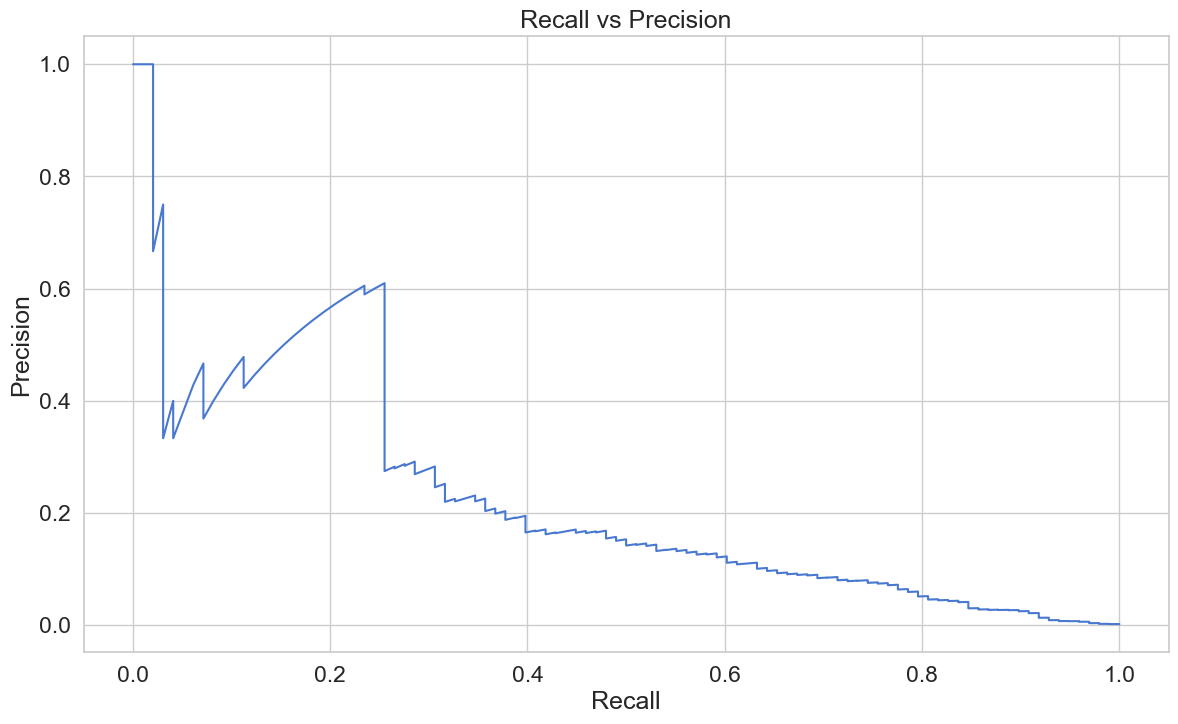

In [54]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


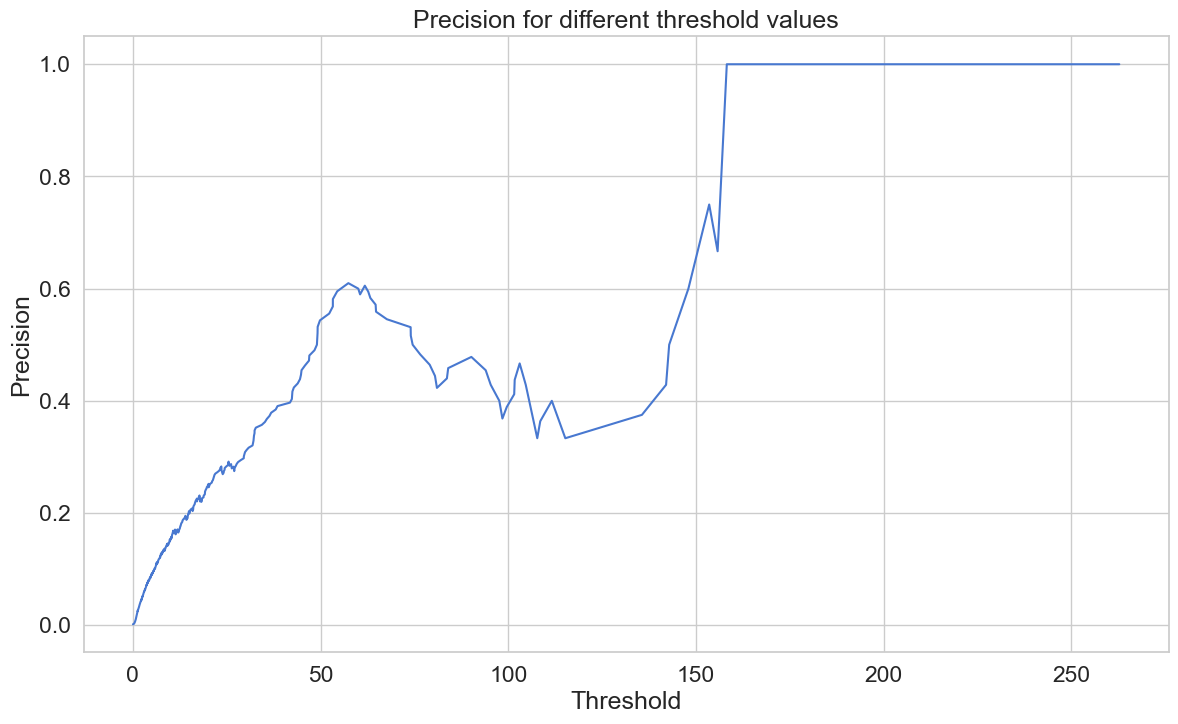

In [55]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

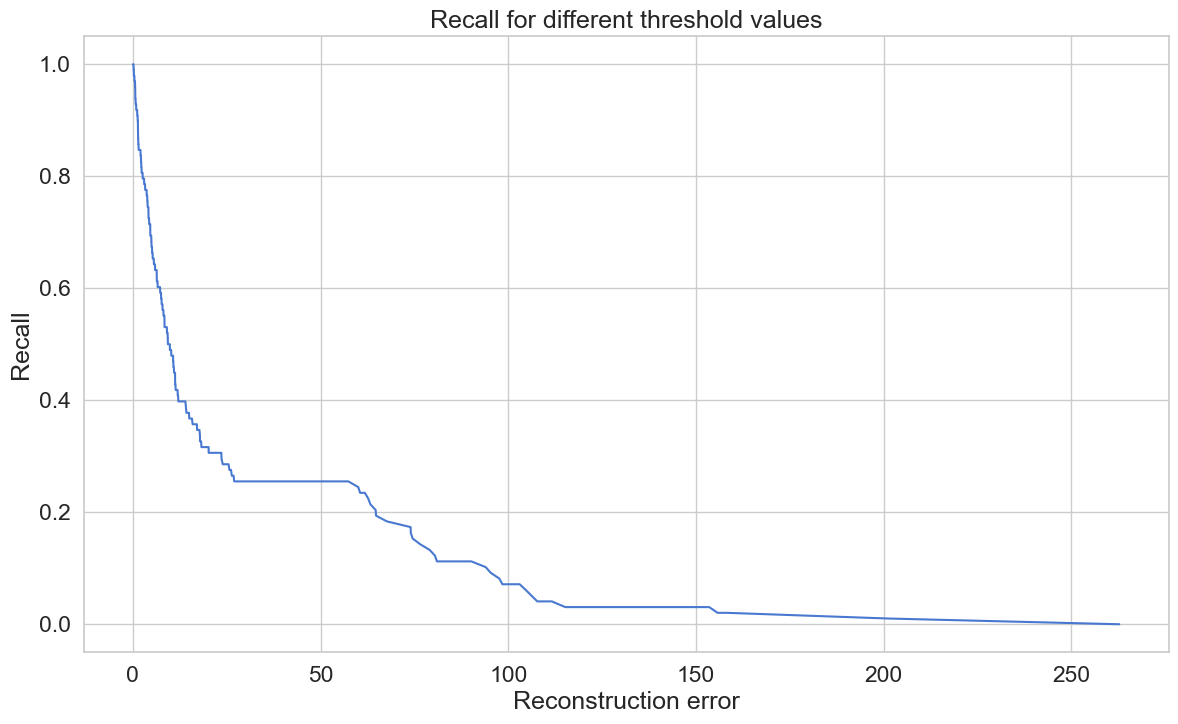

In [56]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [57]:
threshold = 2.9

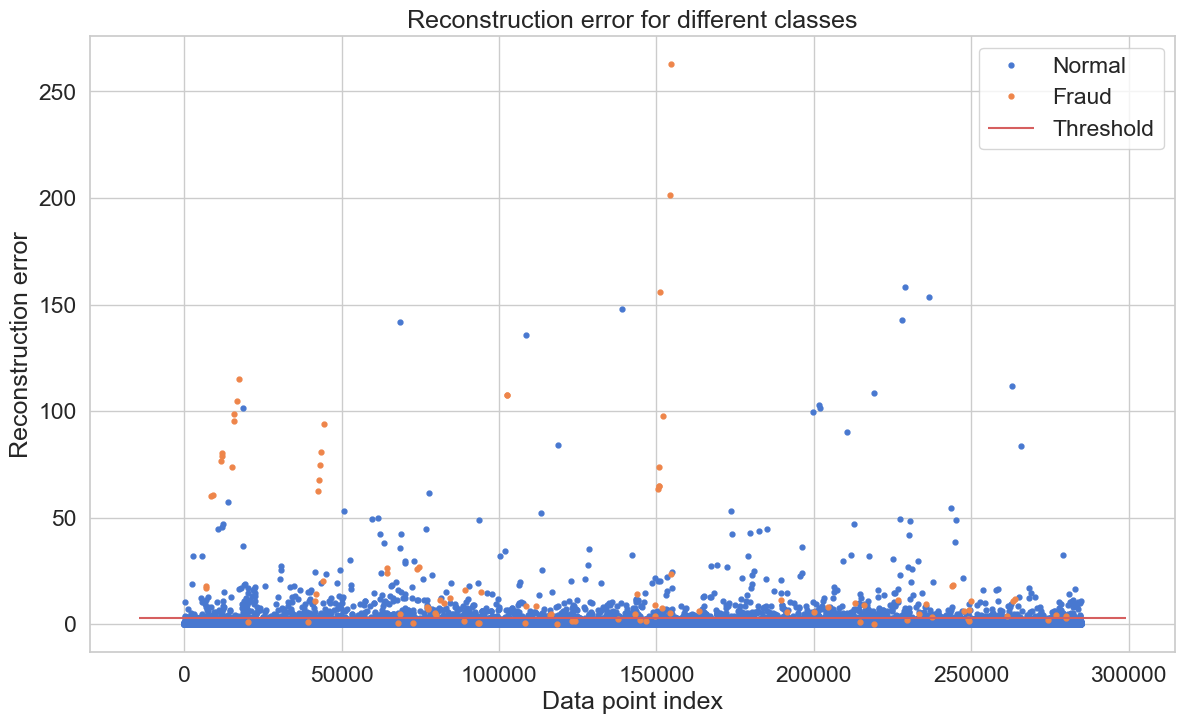

In [58]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

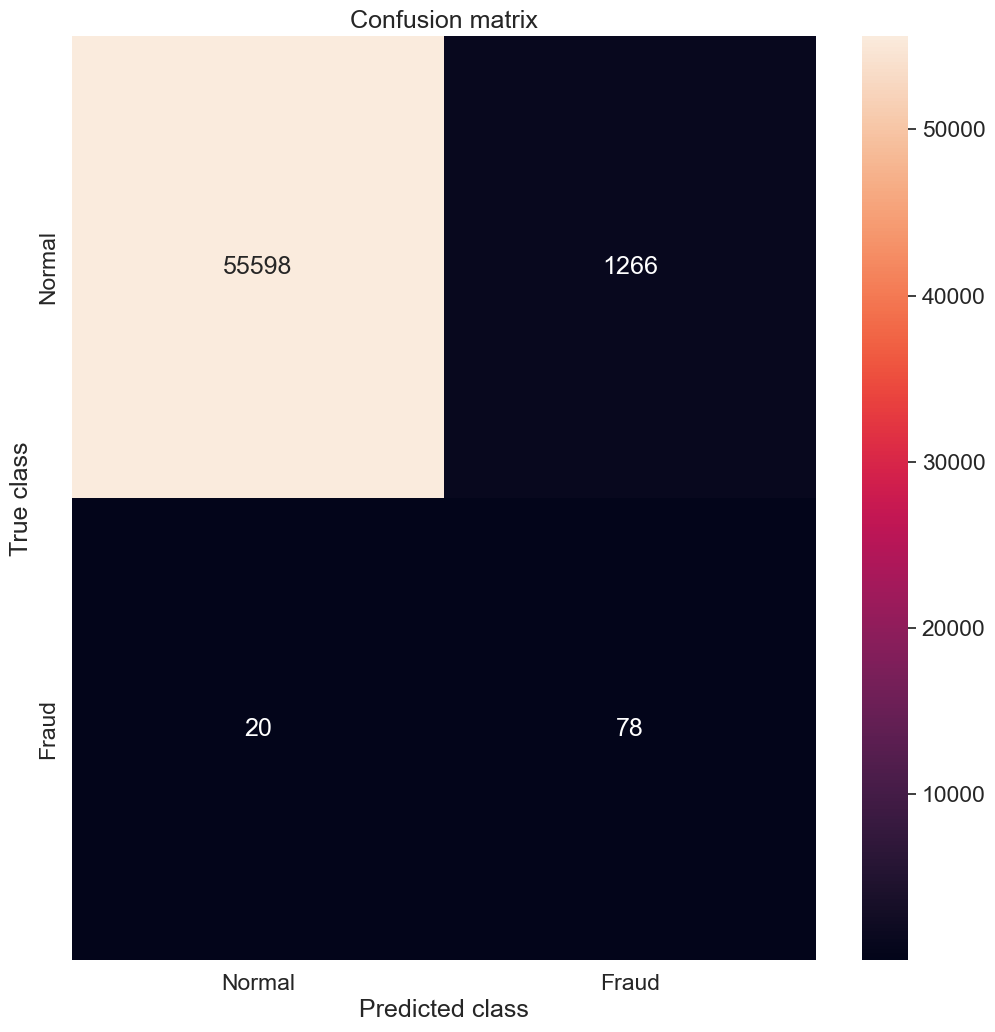

In [59]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()